# Easy Visa

## Problem Statement

**Context**

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

**Objective**:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

Facilitate the process of visa approvals.
Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

**Data Description**

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

- **case_id**: ID of each visa application
- **continent**: Information of continent the employee
- **education_of_employee**: Information of education of the employee
- **has_job_experience**: Does the employee has any job experience? Y= Yes; N = No
- **requires_job_training**: Does the employee require any job training? Y = Yes; N = No
- **no_of_employees**: Number of employees in the employer's company
- **yr_of_estab**: Year in which the employer's company was established
- **region_of_employment**: Information of foreign worker's intended region of employment in the US.
- **full_time_position**: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
- **unit_of_wage**: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
- **prevailing_wage**: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
- **case_status**: Flag indicating if the Visa was certified or denied

**BirdEye** 👀

It consists of visa application records with features related to the employee (e.g., education, experience), the employer (e.g., company size, establishment year), job details (e.g., wage, employment region), and the final case status (certified or denied)

**Key Questions that can be answered** 🎯

1. What factors influence visa approval the most?
2. Do certain types of applicants have a better chance of approval?
3. Does salary or wage type affect visa approval?
4. Do bigger or older companies have an advantage?

## Data background and Contents

The dataset contains 11 columns, including:  

- **Employee details**: Continent, Education, Job Experience, Job Training  
- **Employer details**: Number of Employees, Year of Establishment  
- **Job attributes**: Region of Employment, Prevailing Wage, Wage Unit, Full-time Position  
- **Target variable**: Case Status (Certified or Denied)  

### Preparation

In [5]:
# verify
import sys
print(sys.executable, sys.version)

/Users/nipunshah/anaconda3/bin/python 3.11.4 (main, Jul  5 2023, 08:54:11) [Clang 14.0.6 ]


In [6]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings('ignore') # Ignores all warnings (optional)

In [7]:
# Global options and themes

# Set pandas display options for better readability
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', 100)      # Show 100 rows by default

# Seaborn theme for consistent plotting style
sns.set_theme(style="whitegrid", palette="muted", context="notebook")  # You can change it to darkgrid, ticks, etc.
plt.rcParams["figure.figsize"] = (15, 5)  # Set default figure size for plots
plt.rcParams["font.size"] = 14            # Set font size for readability

# restrict float display to 2 decimal places
pd.options.display.float_format = '{:.2f}'.format

In [8]:
# Primitive Utils
def snake_to_pascal(snake_str, join_with=" "):
    """Convert snake_case to PascalCase (eg my_name -> MyName)
    Args:
        snake_str (str): string to convert
        join_with (str): character to join the components, default is space
    """
    components = snake_str.split("_")
    return join_with.join(x.title() for x in components)


def format_pct(val):
    """Format a val as percentage i.e max 2 decimal value & adding % at the end"""
    return f"{val:.1f}%"

def to_percentage(value):
    """value is expected to be a normalized float value in [0, 1]"""
    return format_pct(value * 100)

In [9]:
def draw_countplot(
    df,
    colName: str,
    *,
    label=None,
    rot=0,
    order=None,
    sort=True,
    palette=None,
    showgrid=None,
):
    """
    Draw a count plot with value labels and optional features
    """
    # prep (meta) --
    xlabel = label if label else snake_to_pascal(colName)
    priority = None
    if order is not None:
        priority = order
    elif sort:
        # sort by count
        priority = df[colName].value_counts().index

    # plot (crux) --
    ax = sns.countplot(data=df, x=colName, order=priority, palette=palette)
    # display count above each bar
    ax.bar_label(ax.containers[0])

    # Calculate & mark percentages
    total = len(df[colName])
    for p in ax.patches:
        freq = p.get_height()
        percentage = to_percentage(freq / total)
        ax.annotate(
            percentage,
            (p.get_x() + p.get_width() / 2.0, freq / 2.0),
            ha="center",
            va="center",
        )

    # aesthetics --
    plt.title(f"Frequency of {xlabel}")
    plt.xlabel(xlabel)
    plt.ylabel("count")
    plt.xticks(rotation=rot)
    if showgrid:
        plt.grid(True)
    plt.show()

In [10]:
# list all files in current directory
!ls

EasyVisa.csv   notebook.ipynb


In [11]:
# Load the dataset
df = pd.read_csv('EasyVisa.csv')
# backup of original df
df_original = df.copy()

In [12]:
# Peek the dataset
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.20,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.86,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.03,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.39,Year,Y,Certified


In [13]:
# Shape (Size)
df.shape

(25480, 12)

🧐 The dataset contains **25,480** visa applications with **12 features**, including employee background, employer details, job specifics, and _visa decision_

In [15]:
# Data Types
df.dtypes


case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object

🧐 The dataset includes categorical and numerical features, with most columns being categorical (e.g., continent, education, job experience), while no_of_employees, yr_of_estab, and prevailing_wage are numerical.

> Hence we need to perform Categorical Encoding for multiple columns

In [16]:
df.nunique()

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

> case_id can be excluded as it holds too many values which is nominal in nature !

In [18]:
# Columns Information
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [19]:
# Missing values
missing_values = df.isnull().sum().sum()
missing_values

0

👀 There are **no missing values** in dataset

In [20]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


👀 The dataset has **no duplicate entries**, ensuring each visa application is unique.

In [30]:
# Statistical summary (only numerical columns)
stats = df.describe(include=['int64', 'float64']).T
stats

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.00,5667.04,22877.93,-26.00,1022.00,2109.00,3504.00,602069.00
yr_of_estab,25480.00,1979.41,42.37,1800.00,1976.00,1997.00,2005.00,2016.00
prevailing_wage,25480.00,74455.81,52815.94,2.14,34015.48,70308.21,107735.51,319210.27


Looking at the numbers: 

1. **Company sizes** vary dramatically - from tiny operations to massive corporations with over 600,000 employees. Most companies are mid-sized.
2. **Company age** shows most are established businesses, not startups. The oldest dates back to 1800.
3. **Wages** range from extremely low ($2.14) to very high ($319,210), with most around $70,000. The huge range suggests different job types or possible data errors at the low end.

❗There are negative values (-26) for no_of_employees, which seem incorrect and may need correction.

In [33]:
# total application with -ve no_of_employees count
df[df['no_of_employees'] < 0].shape[0]

33

It seems the -ve values may be due to data entry error

In [37]:
df['case_status'].value_counts()

Certified    17018
Denied        8462
Name: case_status, dtype: int64

Focus on recall for the "Denied" class: minimize false negatives (cases where the model predicts "Certified" but the actual outcome was "Denied").

approving someone who should be denied, which has more serious consequences than the opposite error.

## Univariate Analysis (EDA)

#### 1. Continent 
(Categorical - nominal)

In [45]:
df['continent'].describe()

count     25480
unique        6
top        Asia
freq      16861
Name: continent, dtype: object

In [44]:
df['continent'].value_counts()


Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64

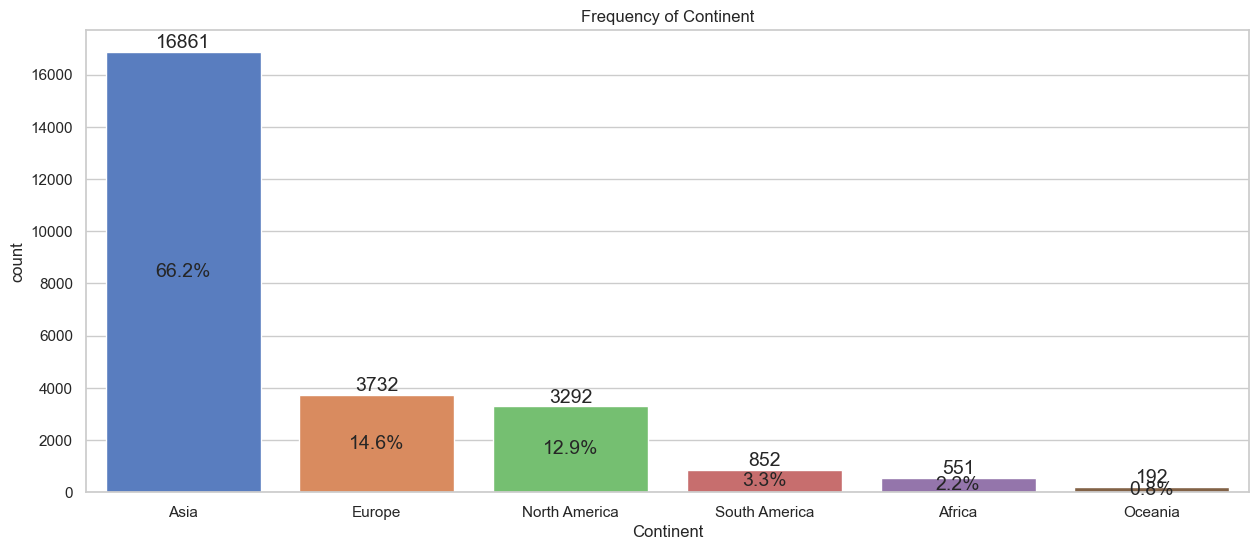

In [51]:
plt.figure(figsize=(15, 6))
draw_countplot(df, 'continent', label='Continent')

🔍 Based on the continent distribution shown in your EDA:

1. **Asia dominates applications**: Two-thirds (66.2%) of all visa applications come from Asia, making it by far the largest source of applicants.

2. **Europe and North America follow**: These regions account for 14.6% and 12.9% respectively, forming the second tier of applicants.

3. **Limited representation from other regions**: South America (3.3%), Africa (2.2%), and Oceania (0.8%) contribute relatively few applications.

**For modeling**: The heavy imbalance across continents means tree-based models will have much more data to learn patterns for Asian applicants than for those from smaller regions like Oceania.


#### 2. Education of Employee
(categorical - ordinal)

In [52]:
df['education_of_employee'].describe()

count          25480
unique             4
top       Bachelor's
freq           10234
Name: education_of_employee, dtype: object

In [53]:
df['education_of_employee'].value_counts()

Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64

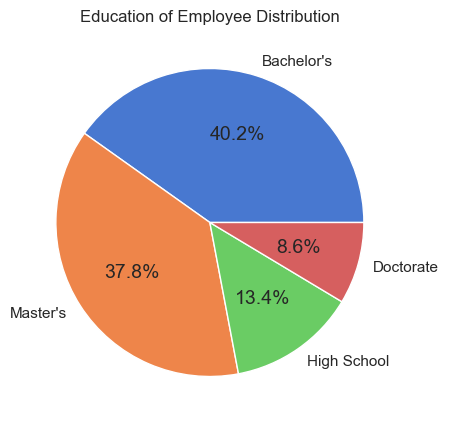

In [54]:
education_counts = df['education_of_employee'].value_counts()
education_counts.plot.pie(autopct='%1.1f%%', figsize=(5, 5))
plt.ylabel('')  # Remove y-label
plt.title('Education of Employee Distribution')
plt.show()

🔍 Based on the education distribution:

1. **Bachelor's and Master's degrees dominate**: These two education levels account for nearly 80% of all applicants (40.2% Bachelor's, 37.8% Master's).

2. **Fewer high school and doctorate applicants**: High school graduates (13.4%) and doctorate holders (8.6%) represent smaller portions of the applicant pool.

3. **Highly educated workforce**: The vast majority (86.6%) of visa applicants have college degrees, indicating employers are primarily seeking skilled, educated workers.

> tree-based models will have substantial data across all education categories, though they may learn more reliable patterns for Bachelor's and Master's degree holders.

#### 3. Has Job Experience
(categorical - binary)

In [55]:
df['has_job_experience'].describe()

count     25480
unique        2
top           Y
freq      14802
Name: has_job_experience, dtype: object

In [56]:
df['has_job_experience'].value_counts()

Y    14802
N    10678
Name: has_job_experience, dtype: int64

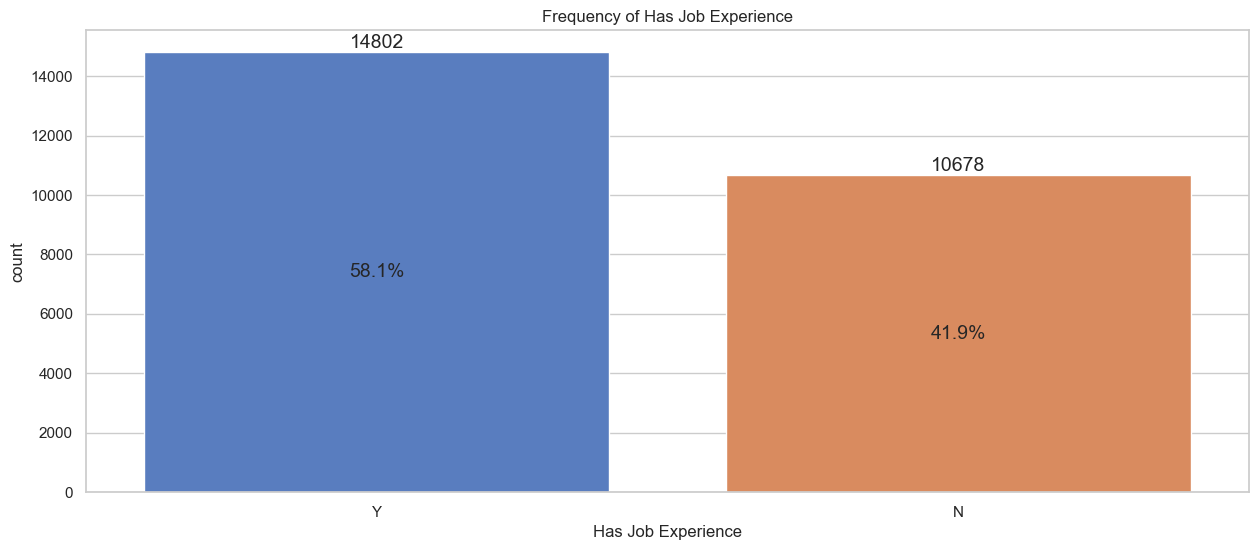

In [57]:
plt.figure(figsize=(15, 6))
draw_countplot(df, 'has_job_experience', label='Has Job Experience')

🔍 Based on the job experience distribution:

1. **Experience dominates**: Most applicants (58.1%) have job experience, while a substantial minority (41.9%) do not.

2. **Balanced distribution**: The split between experienced and inexperienced applicants is relatively balanced, with a moderate skew toward experienced workers.

3. **Diverse talent pool**: The significant presence of both experienced and inexperienced applicants suggests visa programs serve both entry-level and experienced positions.

> Your tree-based models will have sufficient data for both experience categories, allowing reliable pattern detection for both groups.